Importing neccesary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading Netflix dataset
file_path = "/content/netflix_data.csv"
df = pd.read_csv(file_path)

In [ ]:
# Filter movies from dataset
movies = df[df['type'] == 'Movie']
# Displaying first few rows of movies
print(movies.head())

  show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year  duration  \
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123   
6       June 1, 2020          2019        95   

       

In [ ]:
# Summary and basic info about the dataset
print(movies.info())
print(movies.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 5377 entries, 1 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5377 non-null   object
 1   type          5377 non-null   object
 2   title         5377 non-null   object
 3   director      5214 non-null   object
 4   cast          4951 non-null   object
 5   country       5147 non-null   object
 6   date_added    5377 non-null   object
 7   release_year  5377 non-null   int64 
 8   duration      5377 non-null   int64 
 9   description   5377 non-null   object
 10  genre         5377 non-null   object
dtypes: int64(2), object(9)
memory usage: 504.1+ KB
None
       release_year     duration
count   5377.000000  5377.000000
mean    2012.920030    99.307978
std        9.663282    28.530881
min     1942.000000     3.000000
25%     2012.000000    86.000000
50%     2016.000000    98.000000
75%     2018.000000   114.000000
max     2021.000000   312.00000

In [ ]:
# Convert release_year and duration columns to numeric
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce')
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

<ipython-input-5-782c2ac8b23b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce')
<ipython-input-5-782c2ac8b23b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')


In [ ]:
# Calculate average duration per year
avg_duration_per_year = movies.groupby('release_year')['duration'].mean().dropna()

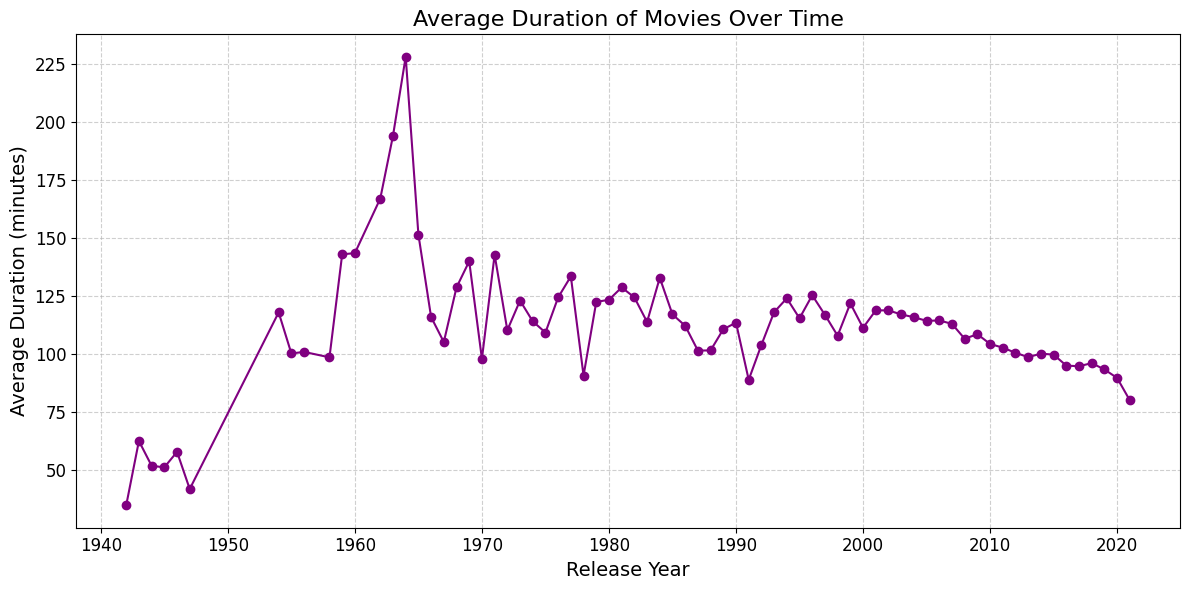

In [ ]:
# Plot the average duration over the years
plt.figure(figsize=(12, 6))
plt.plot(avg_duration_per_year.index, avg_duration_per_year.values, marker='o', color='purple', linestyle='-')
plt.title('Average Duration of Movies Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Duration (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Filter movies with duration less than 90 minutes
short_movies = movies[movies['duration'] < 90]

In [ ]:
# Splitting genres into lists and exploding the dataframe
short_movies['genre'] = short_movies['genre'].str.split(',')
exploded_genres = short_movies.explode('genre')

<ipython-input-9-332ff2216274>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_movies['genre'] = short_movies['genre'].str.split(',')


In [ ]:
# Count the frequency of each genre
genre_counts = exploded_genres['genre'].value_counts()

In [ ]:

print("Most Common Genres in Short-time Movies:")
print(genre_counts)


Most Common Genres in Short-time Movies:
genre
Documentaries           420
Stand-Up                304
Children                293
Comedies                179
Dramas                  172
Action                   86
Horror Movies            73
Uncategorized            55
International Movies     17
Thrillers                16
Classic Movies           15
Music                     9
Cult Movies               4
Anime Features            4
Romantic Movies           3
Sports Movies             1
Independent Movies        1
Sci-Fi                    1
Name: count, dtype: int64


In [ ]:
# Reading "The Office" episodes dataset
file_path = "/content/office_episodes.csv"
df_office = pd.read_csv(file_path)

In [ ]:
# Filter episodes with guest stars
office_with_guests = df_office[df_office['has_guests'].notnull()]

In [ ]:
# Filling missing guest stars with empty strings
office_with_guests['guest_stars'] = office_with_guests['guest_stars'].fillna('')

In [ ]:
# Splitting and cleaning guest star names
guest_stars_list = office_with_guests['guest_stars'].str.split(',')
all_guest_stars = [star.strip() for sublist in guest_stars_list for star in sublist if star]

In [ ]:
# Reading "The Office" episodes dataset again
file_path = '/content/office_episodes.csv'
office_df = pd.read_csv(file_path)

In [ ]:
# Convert columns to numeric
office_df['ratings'] = pd.to_numeric(office_df['ratings'], errors='coerce')
office_df['votes'] = pd.to_numeric(office_df['votes'], errors='coerce')
office_df['viewership_mil'] = pd.to_numeric(office_df['viewership_mil'], errors='coerce')
office_df['scaled_ratings'] = pd.to_numeric(office_df['scaled_ratings'], errors='coerce')

In [ ]:
# Get the top 10 episodes by scaled ratings
top_episodes = office_df.sort_values(by='scaled_ratings', ascending=False).head(10)

In [ ]:
# Calculate average statistics for the top episodes
average_ratings = top_episodes['ratings'].mean()
average_votes = top_episodes['votes'].mean()
average_viewership = top_episodes['viewership_mil'].mean()

In [ ]:
print("\nCharacteristics of Most Popular Episodes:")
print(f"Average Ratings: {average_ratings:.2f}")
print(f"Average Votes: {average_votes:.0f}")
print(f"Average Viewership (in millions): {average_viewership:.2f}")


Characteristics of Most Popular Episodes:
Average Ratings: 9.52
Average Votes: 5730
Average Viewership (in millions): 9.07


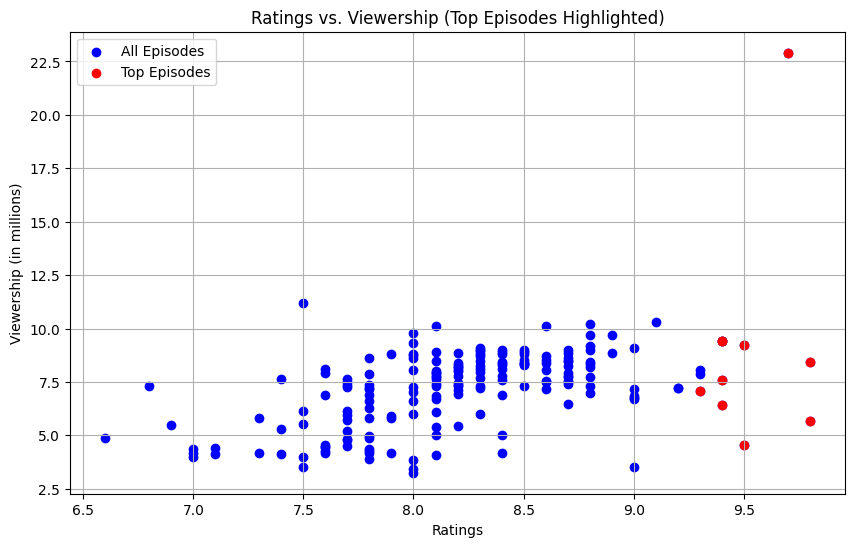

In [ ]:

# Scatter plot of ratings vs viewership
plt.figure(figsize=(10, 6))
plt.scatter(office_df['ratings'], office_df['viewership_mil'], color='blue', label='All Episodes')
plt.scatter(top_episodes['ratings'], top_episodes['viewership_mil'], color='red', label='Top Episodes')
plt.title("Ratings vs. Viewership (Top Episodes Highlighted)")
plt.xlabel("Ratings")
plt.ylabel("Viewership (in millions)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns

# Reading Netflix dataset again
file_path = '/content/netflix_data.csv'
df_netflix = pd.read_csv(file_path)

In [ ]:
# Filling missing genres and countries
df_netflix['genre'] = df_netflix['genre'].fillna('')
df_netflix['country'] = df_netflix['country'].fillna('')

In [ ]:
# Splitting genres and countries into multiple rows
genres = df_netflix['genre'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
countries = df_netflix['country'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)

In [ ]:
# Creating combined dataframe for country and genre
df_genres = df_netflix[['show_id']].join(genres.rename('genre'))
df_countries =df_netflix[['show_id']].join(countries.rename('country'))
df_combined = pd.merge(df_countries, df_genres, on='show_id')

In [ ]:
# Count content by country and genre
country_genre_counts = df_combined.groupby(['country', 'genre']).size().reset_index(name='count')


In [ ]:
# Filter top countries and genres
top_countries = country_genre_counts.groupby('country')['count'].sum().nlargest(10).index
top_genres = country_genre_counts.groupby('genre')['count'].sum().nlargest(10).index


In [ ]:
# Filter data for top countries and genres
filtered_data = country_genre_counts[
    (country_genre_counts['country'].isin(top_countries)) &
    (country_genre_counts['genre'].isin(top_genres))
]

In [ ]:
# Create a pivot table for heatmap
pivot_table = filtered_data.pivot(index='country', columns='genre', values='count').fillna(0)

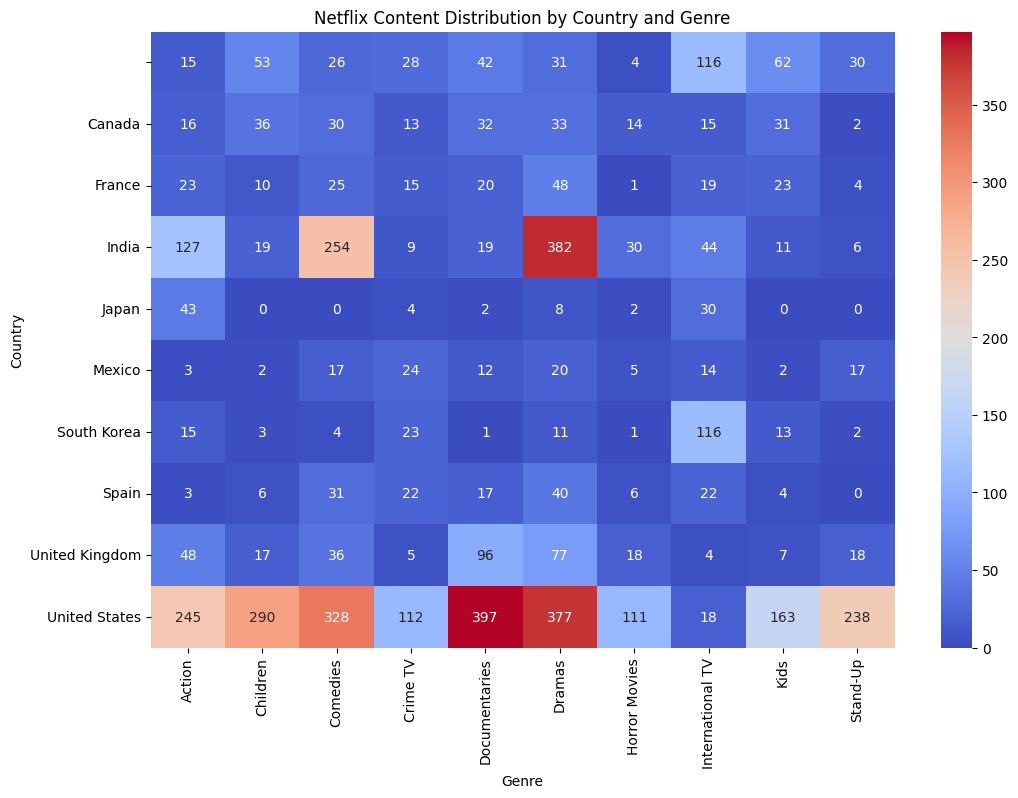

In [ ]:
# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm', cbar=True)
plt.title('Netflix Content Distribution by Country and Genre')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.show()